This notebook finds the most frequent words from a processed TinyStories dataset and plots the number of available sentences that use only a number of most frequent words. It outputs a dataset of sentences that uses only the top K most frequent words.

Input file:
`/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/data/TinyStories-processed.txt`

Output file:
`/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/data/TinyStories-frequent-K.txt`

where K is 100, 200, 300, 400, 500, and the file containing the words and their frequencies
`/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/data/TinyStories-word-freq.csv`

In [1]:
input_file = "/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/data/TinyStories-processed.txt"

In [2]:
from collections import Counter
from tqdm import tqdm
import os

# Initialize the Counter
word_freq = Counter()

# Get the file size
file_size = os.path.getsize(input_file)

# Open the file and initialize tqdm with the total file size
with open(input_file, 'r') as file:
    pbar = tqdm(total=file_size, desc="Processing lines", unit="B", unit_scale=True, unit_divisor=1024)

    for line in file:
        # Tokenize the line into words
        words = line.split()
        # Update the word frequencies
        word_freq.update(words)
        # Update the progress bar by the length of the line
        pbar.update(len(line.encode('utf-8')))

# Close the progress bar
pbar.close()


Processing lines: 100%|██████████| 994M/994M [00:42<00:00, 24.4MB/s] 


In [3]:
import pandas as pd

# Convert the word_freq counter to a DataFrame
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])

# Sort the DataFrame by frequency in descending order
df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

# Reset the index to bring the keys of the dictionary (currently the index) as a column
df_word_freq = df_word_freq.reset_index()

# Rename the columns to 'Character' and 'Frequency'
df_word_freq.columns = ['Character', 'Frequency']

# Display the updated DataFrame
df_word_freq.head(20)

,Character,Frequency
0,.,21637643
1,the,13026562
2,and,9573623
3,a,8937078
4,",",8350439
5,to,7517841
6,was,5975410
7,they,4916225
8,he,4269702
9,it,3083743


In [4]:
df_word_freq.tail(20)

,Character,Frequency
28412,league,1
28413,prima,1
28414,rating,1
28415,badboy,1
28416,saviours,1
28417,redecorating,1
28418,resounding,1
28419,jungleland,1
28420,mis,1
28421,wrinkliest,1


In [5]:
# Add a column for the rank of the character by frequency
# NOTE: ties are possible using method dense (consecutive integers, ties share same rank)
df_word_freq['Rank'] = df_word_freq['Frequency'].rank(ascending=False, method='dense').astype(int)

# Assert that there are no ties in the ranks
# assert df_word_freq['Rank'].nunique() == len(df_word_freq), "There are ties in the ranks"

# Display the updated DataFrame
df_word_freq.head(20)

,Character,Frequency,Rank
0,.,21637643,1
1,the,13026562,2
2,and,9573623,3
3,a,8937078,4
4,",",8350439,5
5,to,7517841,6
6,was,5975410,7
7,they,4916225,8
8,he,4269702,9
9,it,3083743,10


In [6]:
df_word_freq.head(20)

,Character,Frequency,Rank
0,.,21637643,1
1,the,13026562,2
2,and,9573623,3
3,a,8937078,4
4,",",8350439,5
5,to,7517841,6
6,was,5975410,7
7,they,4916225,8
8,he,4269702,9
9,it,3083743,10


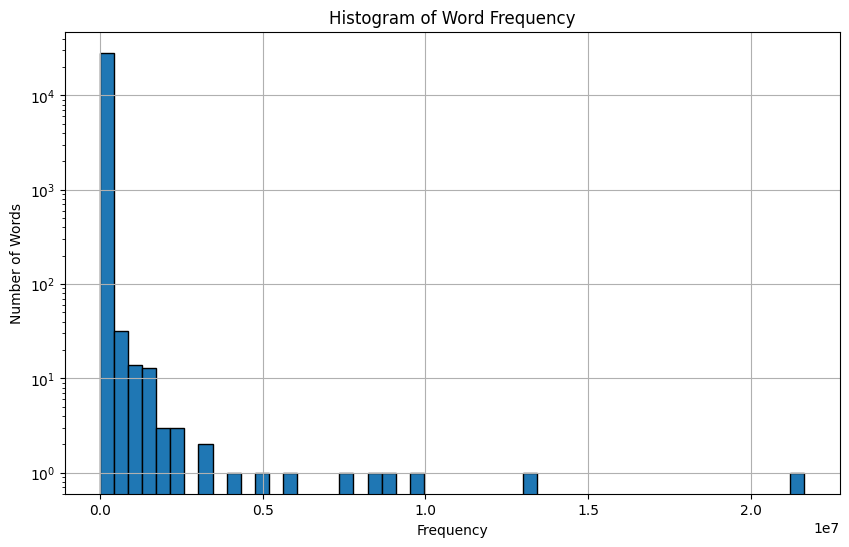

In [7]:
import matplotlib.pyplot as plt

# Plot the histogram of word frequency with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.hist(df_word_freq['Frequency'], bins=50, edgecolor='black')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Number of Words')
plt.title('Histogram of Word Frequency')
plt.grid(True)
plt.show()

In [8]:
# number of words with unique rank
df_word_freq['Rank'].nunique()

4113

In [9]:
len(df_word_freq)

28432

In [10]:
# we will use non-dup instead and rank from 0
# we use a 0-indexed rank system, with no ties
df_word_freq = df_word_freq.sort_values(by="Character")
df_word_freq['Rank'] = df_word_freq['Frequency'].rank(ascending=False, method='first').astype(int)
df_word_freq['Rank'] = df_word_freq['Rank'] - 1

# Assert that there are no ties in the ranks
assert df_word_freq['Rank'].nunique() == len(df_word_freq), "There are ties in the ranks"

In [11]:
df_word_freq.to_csv("/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/data/TinyStories-word-freq.csv")

In [12]:
sticked_comma_words = []

for c in df_word_freq["Character"]:
    if "," in c:
        sticked_comma_words.append(c)

print(sticked_comma_words)

[',']


In [13]:
sticked_period_words = []

for c in df_word_freq["Character"]:
    if "." in c:
        sticked_period_words.append(c)

print(sticked_period_words)

['.']


In [14]:
word_rank = df_word_freq.set_index("Character")["Rank"].to_dict()

In [15]:
worst_ranks = []

# Open the input file again to read sentences
with open(input_file, 'r') as file:
    pbar = tqdm(total=file_size, desc="Processing lines", unit="B", unit_scale=True, unit_divisor=1024)
    for line in file:
        words = line.split()
        # Filter out words that are not in the word_rank dictionary
        worst_rank = max([int(word_rank[word]) for word in words])
        worst_ranks.append(worst_rank)
        pbar.update(len(line.encode("utf-8")))

Processing lines: 100%|█████████▉| 993M/994M [00:53<00:00, 19.2MB/s] 

In [16]:
sorted_worst_ranks = sorted(worst_ranks)

In [17]:
total = 0
rank_count = dict()

for rank in tqdm(sorted_worst_ranks):
    total += 1
    rank_count[rank] = total

100%|██████████| 21637643/21637643 [00:03<00:00, 5475542.65it/s]


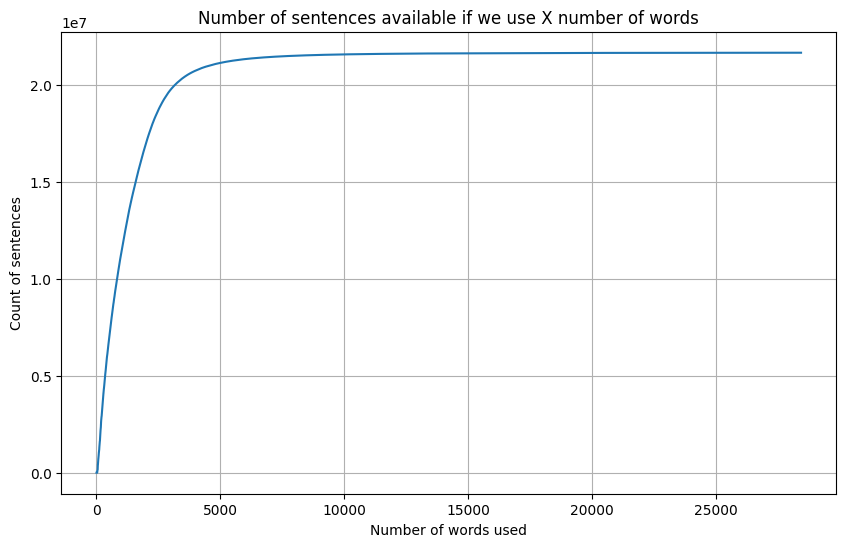

In [18]:
import matplotlib.pyplot as plt

# Extract keys and values from rank_count dictionary
keys = list(rank_count.keys())
values = list(rank_count.values())

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(keys, values)
plt.xlabel('Number of words used')
plt.ylabel('Count of sentences')
plt.title('Number of sentences available if we use X number of words')
plt.grid(True)
plt.show()

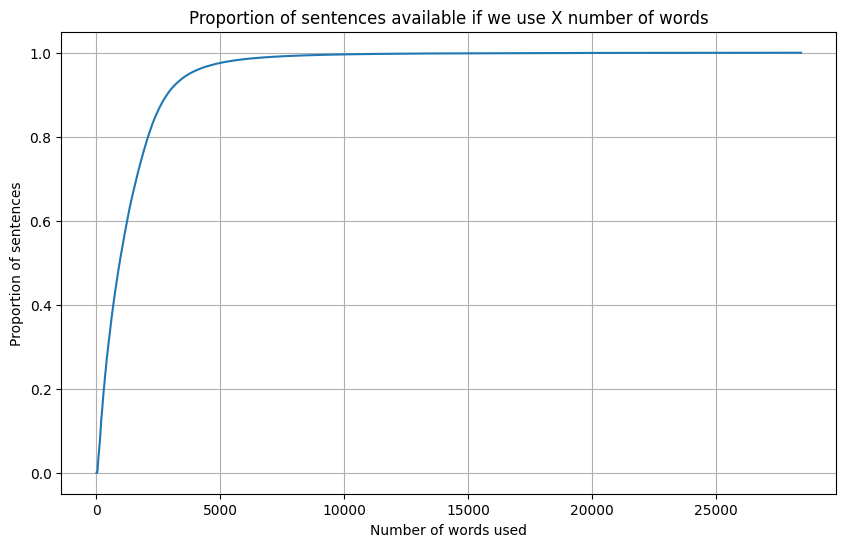

In [19]:
num_sentences = len(worst_ranks)
prop_sentences = [k/num_sentences for k in values]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(keys, prop_sentences)
plt.xlabel('Number of words used')
plt.ylabel('Proportion of sentences')
plt.title('Proportion of sentences available if we use X number of words')
plt.grid(True)
plt.show()

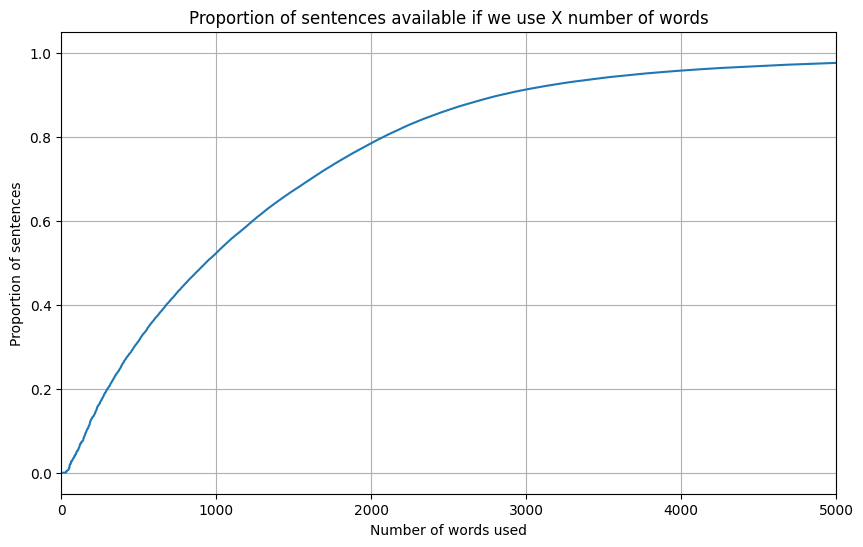

In [20]:
num_sentences = len(worst_ranks)
prop_sentences = [k/num_sentences for k in values]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(keys, prop_sentences)
plt.xlabel('Number of words used')
plt.ylabel('Proportion of sentences')
plt.title('Proportion of sentences available if we use X number of words')
plt.xlim(0,5000)
plt.grid(True)
plt.show()

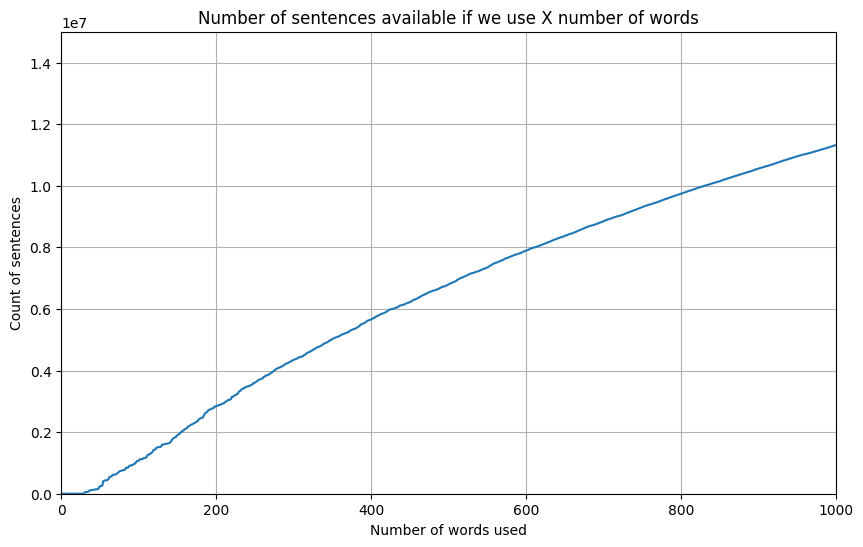

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(keys, values)
plt.xlabel('Number of words used')
plt.ylabel('Count of sentences')
plt.title('Number of sentences available if we use X number of words')
plt.xlim(0,1000)
plt.ylim(0,1.5e7)
plt.grid(True)
plt.show()

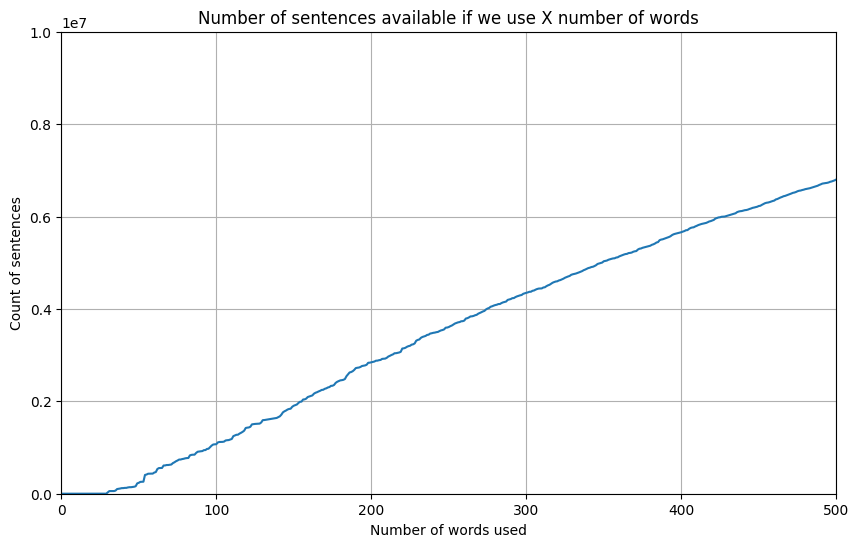

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(keys, values)
plt.xlabel('Number of words used')
plt.ylabel('Count of sentences')
plt.title('Number of sentences available if we use X number of words')
plt.xlim(0,500)
plt.ylim(0,1e7)
plt.grid(True)
plt.show()

We will create datasets for sentences that use the most frequent 100, 200, 300, 400 and 500 words.

In [23]:
# Initialize an empty list to store the sentences
filtered_sentences = []

# Open the input file again to read sentences
with open(input_file, 'r') as file:
    pbar = tqdm(total=file_size, desc="Processing lines", unit="B", unit_scale=True, unit_divisor=1024)
    
    for i, line in enumerate(file):
        if worst_ranks[i] <= 100:
            filtered_sentences.append(line.strip())
        pbar.update(len(line.encode("utf-8")))

# Display the first 10 filtered sentences
filtered_sentences[:10]

Processing lines: 100%|██████████| 994M/994M [01:01<00:00, 16.8MB/s]


['one day , a little boy named tim went to the park .',
 'they were very happy .',
 'one day , a boy named tim went to the park to play .',
 'one day , a little boy named tim went to the park with his mom .',
 'he had a dog named spot .',
 'they saw a big bird in a tree .',
 'then , they went back to their small house .',
 'they were happy to be together .',
 'one day , tim went to the park to play with his friends .',
 'she loved to play in it .']

In [24]:
# number of such sentences: around 1 million
len(filtered_sentences)

1071376

In [25]:
import hashlib

def get_duplicates(filtered_sentences):
    # Generate hash values for all sentences
    hashes = [hash(sentence) for sentence in filtered_sentences]

    # Use a dictionary to count occurrences of each hash
    hash_count = {}
    for h in hashes:
        if h in hash_count:
            hash_count[h] += 1
        else:
            hash_count[h] = 1

    # Find duplicates by checking counts in the dictionary
    duplicates = [sentence for sentence, h in zip(filtered_sentences, hashes) if hash_count[h] > 1]
    
    return duplicates

duplicates = get_duplicates(filtered_sentences)
# Print the unique duplicates
len(duplicates)

1014747

In [26]:
# proportion of duplicates
str(round(len(duplicates)/len(filtered_sentences)*100,2))+'%'

'94.71%'

In [28]:
# Initialize an empty list to store the sentences
ranks = [100, 200, 300, 400, 500]
dup_rates = []

for rank in ranks:
    filtered_sentences = []
    # Open the input file again to read sentences
    with open(input_file, 'r') as file:
        pbar = tqdm(total=file_size, desc="Processing lines", unit="B", unit_scale=True, unit_divisor=1024)
        
        for i, line in enumerate(file):
            if worst_ranks[i] < rank:
                filtered_sentences.append(line)
            pbar.update(len(line.encode("utf-8")))
    dup_rate = round(len(get_duplicates(filtered_sentences)) / len(filtered_sentences)*100,2)
    dup_rates.append(dup_rate)
    
    output_file = f"/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/data/TinyStories-frequent-{rank}.txt"
    with open(output_file, 'w') as file:
        file.write(''.join(filtered_sentences))

Processing lines: 100%|██████████| 994M/994M [00:20<00:00, 52.1MB/s]
Processing lines: 100%|██████████| 994M/994M [00:10<00:00, 103MB/s]  
Processing lines: 100%|██████████| 994M/994M [00:11<00:00, 93.2MB/s]
Processing lines: 100%|██████████| 994M/994M [00:12<00:00, 86.8MB/s] 
Processing lines: 100%|██████████| 994M/994M [00:12<00:00, 81.2MB/s]
Processing lines:  99%|█████████▉| 985M/994M [00:09<00:00, 104MB/s]  

In [29]:
dup_rates

[94.74, 86.51, 79.88, 75.0, 71.21]

In [ ]:
cnt = []
for rank in ranks:
    output_file = f"/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/data/TinyStories-frequent-{rank}.txt"
    with open(output_file, 'r') as file:
        line_count = sum(1 for _ in file)  # Count the number of lines
        cnt.append("{:,}".format(line_count))  # Push the count to cnt

cnt

['1,069,319', '2,836,385', '4,338,458', '5,648,819', '6,783,857']

Processing lines: 100%|██████████| 994M/994M [00:24<00:00, 104MB/s]